In [1]:
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
from fenics import *

import scipy.io as sp
from __future__ import print_function
import mat4py as m4p
import matplotlib.pyplot as plt
import numpy as np
import dolfin as dl
from mat4py import loadmat
from dolfin.cpp.mesh import *

import dolfin as dl
import scipy.io as sp

import numpy as np

import ufl
from dolfin import *
from dolfin.cpp.mesh import *
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mat4py as m4p
import sys



import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)


In [114]:
#geometry=Rectangle(dl.Point(0.0, 0.0), dl.Point(1, 1))
#mesh = (generate_mesh(geometry,40))

mesh = (UnitSquareMesh(30,30))
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14
u_D = Expression('0', degree=2)
def boundary_S(x):
    return  near(x[1], 0.5, tol) and (x[0] > 0.5)

bc_S = DirichletBC(V, u_D, boundary_S)

def boundary_L(x):
    return  near(x[0], 0.0, tol) 

bc_L = DirichletBC(V, u_D, boundary_L)

def boundary_R(x):
    return near(x[0], 1.0, tol) 

bc_R = DirichletBC(V, u_D, boundary_R)

def boundary_B(x):
    return  near(x[1], 0.0, tol) 

bc_B = DirichletBC(V, u_D, boundary_B)

def boundary_T(x):
    return  near(x[1], 1.0, tol) 

bc_T = DirichletBC(V, u_D, boundary_T)

bcs = [bc_S, bc_L, bc_R, bc_B, bc_T]

2601

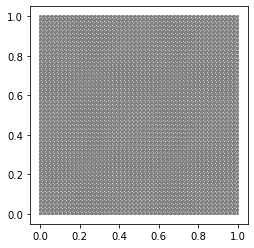

In [71]:
plot(mesh)
len(mesh.coordinates())

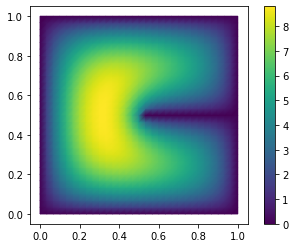

In [115]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(200.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution

u = Function(V)


solve(a == L, u, bcs)



#A,b = assemble_system(a,L,bcs)

#U = u.vector()
#solve(A,U,b)

# Plot solution and mesh
c=plot(u,mode='color')
plt.colorbar(c)
plt.show()

In [116]:
# Create model constraint matrix A, load vector b, coordinates x

dof_coordinates = V.tabulate_dof_coordinates() 
n = V.dim()                                                                      
d = mesh.geometry().dim()    

dof_coordinates.resize((n, d))    

#A,b = assemble_system(a,L,bcs)
A = assemble(a)
b = assemble(L)
#[bc.apply(A,b) for bc in bcs]
AA=A.array()

c_train = dof_coordinates

b_new=np.zeros(len(c_train))
for i in range(len(c_train)):
    b_new[i]=b[i]




solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
    solution_train[i]=u(c_train[i])
    #solution_train[i]=u.vector()[i]

In [109]:
solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
    solution_train[i]=u(c_train[i])

In [126]:
gg=np.matmul(AA,solution_train)-b_new
gg[100]

-7.494005416219807e-16

In [125]:
dof_coordinates[100]

array([0.3       , 0.86666667])

In [120]:
solution_train

array([ 0.00000000e+00,  6.55562777e-16,  7.00774003e-16,  0.00000000e+00,
        4.07226521e-01,  1.23268745e-15,  0.00000000e+00,  7.03493656e-01,
        7.03190206e-01,  3.90348979e-17,  0.00000000e+00,  9.32885228e-01,
        1.25164065e+00,  9.31671428e-01,  5.17181535e-17,  0.00000000e+00,
        1.11623750e+00,  1.68958753e+00,  1.68806900e+00,  1.11320428e+00,
        2.22834938e-15,  0.00000000e+00,  1.26506424e+00,  2.04477832e+00,
        2.30682370e+00,  2.03991800e+00,  1.25900547e+00,  2.43776508e-15,
        0.00000000e+00,  1.38657043e+00,  2.33522680e+00,  2.81583922e+00,
        2.81157682e+00,  2.32459969e+00,  1.37599568e+00,  7.63831045e-17,
        0.00000000e+00,  1.48570934e+00,  2.57328592e+00,  3.23555649e+00,
        3.45397616e+00,  3.22336720e+00,  2.55388587e+00,  1.46886917e+00,
        8.15386186e-17,  0.00000000e+00,  1.56613268e+00,  2.76791202e+00,
        3.58121221e+00,  3.98772552e+00,  3.97854084e+00,  3.55652922e+00,
        2.73619667e+00,  

In [113]:
dof_coordinates

array([[0. , 1. ],
       [0. , 0.9],
       [0.1, 1. ],
       [0. , 0.8],
       [0.1, 0.9],
       [0.2, 1. ],
       [0. , 0.7],
       [0.1, 0.8],
       [0.2, 0.9],
       [0.3, 1. ],
       [0. , 0.6],
       [0.1, 0.7],
       [0.2, 0.8],
       [0.3, 0.9],
       [0.4, 1. ],
       [0. , 0.5],
       [0.1, 0.6],
       [0.2, 0.7],
       [0.3, 0.8],
       [0.4, 0.9],
       [0.5, 1. ],
       [0. , 0.4],
       [0.1, 0.5],
       [0.2, 0.6],
       [0.3, 0.7],
       [0.4, 0.8],
       [0.5, 0.9],
       [0.6, 1. ],
       [0. , 0.3],
       [0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6],
       [0.4, 0.7],
       [0.5, 0.8],
       [0.6, 0.9],
       [0.7, 1. ],
       [0. , 0.2],
       [0.1, 0.3],
       [0.2, 0.4],
       [0.3, 0.5],
       [0.4, 0.6],
       [0.5, 0.7],
       [0.6, 0.8],
       [0.7, 0.9],
       [0.8, 1. ],
       [0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7,

In [10]:
np.linalg.norm(C-b_new)

2.1923743797205434e-10

In [11]:
solution_train

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.992007221626405e-16,
 0.0,
 0.0,
 0.0,
 2.5011301109911616e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -6.602126253104273e-13,
 5.329070518200759e-14,
 7.815970093361102e-14,
 0.0,
 -9.296267459527977e-14,
 -1.0214051826551454e-14,
 0.0,
 -1.1842378929335002e-14,
 0.0,
 -1.0184445879228102e-13,
 4.144832625267256e-15,
 -8.622732157922061e-14,
 8.585724723767876e-14,
 0.0,
 -6.602126253104264e-14,
 0.0,
 -1.4368506384698794e-12,
 -6.235752654977962e-13,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -5.55111512312578e-17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -7.3253992729041e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [6]:
# STORE ALL THE VALUES FOR MODEL CONSTRAINT

# STORE THE STIFFNESS MATRIX AS MAT FILE
savedict = {
    'x' : AA
}
sp.savemat('Stiffness.mat', savedict)

# STORE THE load vector b

bb=list(b_new)
load = {'x': bb}
m4p.savemat('observation.mat', load)

# STORE THE COORDINATES

# STORE THE STIFFNESS MATRIX AS MAT FILE
coordinates = {
    'x' : c_train
}
sp.savemat('Coordinates.mat', coordinates)

solu = {
    'x' : solution_train
}
sp.savemat('Solution.mat', solu)

In [13]:
Coordinates = loadmat('Coordinates.mat')
Coordinates=np.array(list(Coordinates.values()))[-1]


In [23]:
len(Coordinates)

961

In [37]:
Stiffness = loadmat('Stiffness.mat')
Stiffness=np.array(list(Stiffness.values()))[-1]

    
load = loadmat('observation.mat')
load=np.array(list(load.values()))[-1]

load=np.reshape(load,(len(load),1))
    
Solution = loadmat('Solution.mat')
Solution=np.array(list(Solution.values()))[-1]

Solution=np.reshape(Solution,(len(Solution),1))

In [39]:
np.linalg.norm(np.matmul(Stiffness,Solution)-load)



1.954332902479484e-10

In [28]:
b

array([0.        , 0.        , 0.        , 0.        , 0.22222222,
       0.        , 0.        , 0.22222222, 0.22222222, 0.        ,
       0.        , 0.22222222, 0.22222222, 0.22222222, 0.        ,
       0.        , 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.        , 0.        , 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.        , 0.        , 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.        , 0.        , 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.        ,
       0.        , 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.        ,
       0.        , 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222222,
       0.        , 0.        , 0.22222222, 0.22222222, 0.22222222,
       0.22222222, 0.22222222, 0.22222222, 0.22222222, 0.22222

In [14]:
# Generate training data

x_slit = 0.5*np.ones((1000, 2))
xs=np.random.uniform(0.5,1,1000)
x_slit[:,0]=xs

x_right = 1*np.ones((1000, 2))
for i in range(0,1000):
    x_right[i][1]=np.random.uniform(0,1)
    
x_left = 0*np.ones((1000, 2))
for i in range(0,1000):
    x_left[i][1]=np.random.uniform(0,1)
    
x_top = 1*np.ones((1000, 2))
x_top[:,0]=np.random.uniform(0,1,1000)

x_bottom = 0*np.ones((1000, 2))
x_bottom[:,0]=np.random.uniform(0,1,1000)



#mesh_new = dl.refine(UnitSquareMesh(20, 20))
#coordinates_train = np.zeros((4000, 2))

#for i in range(0,4000):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0,1)]
    
#for i in range(2000,3990):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]

#for i in range(0,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.0,1)]
    
#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.0,0.5),np.random.uniform(0.7,1)]

#for i in range(3000,4000):
 #   coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.0,0.5)]

#for i in range(3000,4000):
    #coordinates_train [i]=[np.random.uniform(0.5,1),np.random.uniform(0.5,1)]
    
c_train=np.concatenate((x_slit,x_right,x_left,x_top,x_bottom),axis=0)


np.random.shuffle(c_train)

solution_train=np.zeros(len(c_train))
for i in range(len(c_train)):
  solution_train[i]=u(c_train[i])

In [12]:
len(solution_train)

5000

In [5]:
# Generate test data

coordinates_test=np.random.rand(7000,2)
np.random.shuffle(coordinates_test)

solution_test=np.zeros(len(coordinates_test))
for i in range(len(coordinates_test)):
  solution_test[i]=u(coordinates_test[i])


In [15]:
coordinates_train = 0.5*np.ones((500, 2))

0.2194312626768965

array([[1. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [6]:
gauss_points = loadmat('gauss_points_new.mat')
gauss_points=np.array(list(gauss_points.values()))[-1]

solution_gauss=np.zeros(len(gauss_points))
for i in range(len(gauss_points)):
  solution_gauss[i]=u(gauss_points[i])

In [7]:
# Generate plot data for ploting true solution
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)

solution_plot=np.zeros(len(d))
for i in range(len(d)):
  solution_plot[i]=u(d[i])

In [9]:
np.savetxt('input_train.txt',c_train)
np.savetxt('input_test.txt',coordinates_test)

In [10]:
np.savetxt('output_train.txt',solution_train)
np.savetxt('output_test.txt',solution_test)        

In [7]:
 np.savetxt('gauss_solution.txt',solution_gauss)

In [8]:
np.savetxt('input_plot_data.txt',d)
np.savetxt('output_plot_data.txt',solution_plot)    